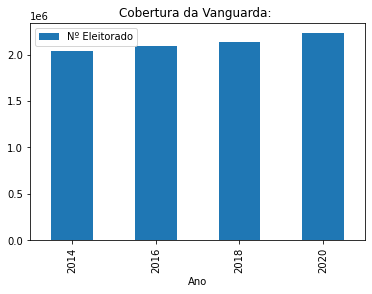

In [3]:
# 4.3
import pandas as pd
import plotly.graph_objects as go
from cobertura import abrangencia
import csv

csvEleitorado2014 = './dados/eleitorado_municipio_2014.csv'
csvEleitorado2016 = './dados/eleitorado_municipio_2016.csv'
csvEleitorado2018 = './dados/eleitorado_municipio_2018.csv'
csvEleitorado2020 = './dados/eleitorado_municipio_2020.csv'

dataEleitorado2014 = pd.read_csv(csvEleitorado2014, sep= ';', encoding='ISO-8859-1')
dataEleitorado2016 = pd.read_csv(csvEleitorado2016, sep= ';', encoding='ISO-8859-1')
dataEleitorado2018 = pd.read_csv(csvEleitorado2018, sep= ';', encoding='ISO-8859-1')
dataEleitorado2020 = pd.read_csv(csvEleitorado2020, sep= ';', encoding='ISO-8859-1')

def createQuery(list):
        count = 0
        query = ""

        for abr_code in list:
                query += 'CD_MUNICIPIO == ' + str(abr_code["codigo"])
                count += 1
                if count < len(list):
                        query += ' or '
        return query

def generateChart(query, label, filename):

        dfEleitorado2014 = pd.DataFrame(data= dataEleitorado2014.query(query), columns=['QTD_ELEITORES'])
        dfEleitorado2016 = pd.DataFrame(data= dataEleitorado2016.query(query), columns=['QTD_ELEITORES'])
        dfEleitorado2018 = pd.DataFrame(data= dataEleitorado2018.query(query), columns=['QTD_ELEITORES'])
        dfEleitorado2020 = pd.DataFrame(data= dataEleitorado2020.query(query), columns=['QTD_ELEITORES'])

        qtdEleitoradoporCobertura = {'Ano': [2014, 2016, 2018, 2020],
        'Nº Eleitorado': [int(dfEleitorado2014.sum(axis=0)), int(dfEleitorado2016.sum(axis=0)), int(dfEleitorado2018.sum(axis=0)), int(dfEleitorado2020.sum(axis=0))]}

        dft = pd.DataFrame(data = qtdEleitoradoporCobertura)
        dft.plot(x="Ano", y="Nº Eleitorado", kind='bar', title=label)
        dft.to_csv('export/'+ filename +'.csv', encoding='utf-8')


query = createQuery(abrangencia)
generateChart(query, 'Cobertura da Vanguarda: ', 'Eleitorado_cobertura')


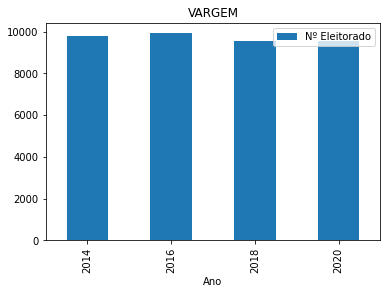

In [7]:
cidade = "VARGEM"
cidadeQuery = 'NM_MUNICIPIO == "'+ cidade +'"'

dfEleitorado2014porCidade = pd.DataFrame(data= dataEleitorado2014.query(cidadeQuery), columns=['QTD_ELEITORES'])
dfEleitorado2016porCidade = pd.DataFrame(data= dataEleitorado2016.query(cidadeQuery), columns=['QTD_ELEITORES'])
dfEleitorado2018porCidade = pd.DataFrame(data= dataEleitorado2018.query(cidadeQuery), columns=['QTD_ELEITORES'])
dfEleitorado2020porCidade = pd.DataFrame(data= dataEleitorado2020.query(cidadeQuery), columns=['QTD_ELEITORES'])

qtdEleitoradoporCidade = {'Ano': [2014, 2016, 2018, 2020],
        'Nº Eleitorado': [int(dfEleitorado2014porCidade.sum(axis=0)), int(dfEleitorado2016porCidade.sum(axis=0)), int(dfEleitorado2018porCidade.sum(axis=0)), int(dfEleitorado2020porCidade.sum(axis=0))]}

dft = pd.DataFrame(data = qtdEleitoradoporCidade)
dft.plot(x="Ano", y="Nº Eleitorado", kind='bar', title=cidade)
dft.to_csv('export/'+ 'Eleitorado_cidade_' + cidade.replace(" ", "_") +'.csv', encoding='utf-8')

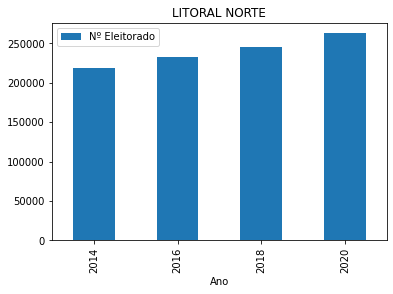

In [6]:
regiao = "LITORAL NORTE"
listaCidades = []

for abr_item in abrangencia:
    if abr_item['regiao'] == regiao:
        listaCidades.append(abr_item)

query = createQuery(listaCidades)
generateChart(query, regiao, 'Eleitorado_regiao')
